In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '../modules/')
import model
import utils

In [11]:
colors_list = ['#237F3D', '#F8905E', '#E6AF2E', '#AE1E20', "#27424D", '#637AD3']

# Modular network

In [17]:
N_modules = 6
Nodes_per_module = [75]*N_modules

N = sum(Nodes_per_module)
Nconn_per_node = 1

seed = 42

cumsum = np.concatenate([[0], np.cumsum(Nodes_per_module)])

p_intra = 0.2
p_connect = 0.05

In [18]:
modular_network, edges_modular = utils.generate_modular_ER(Nodes_per_module, N_modules, p_intra, p_connect)
isolated_network = utils.fragment_all(modular_network, edges_modular)

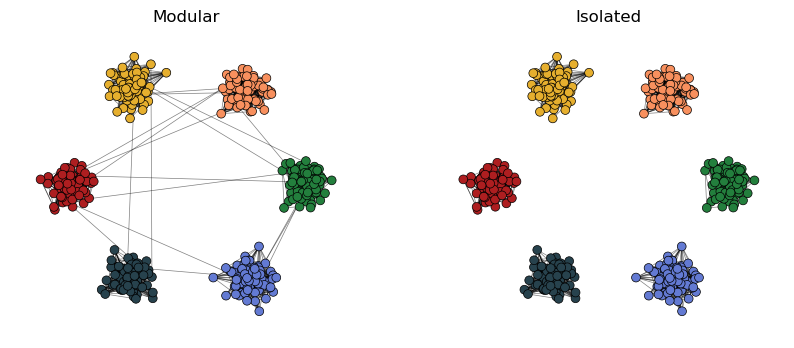

In [19]:
network_list = [modular_network, isolated_network]
titles_list = ['Modular', 'Isolated']

fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(10,4))
pos, node_colors = utils.plot_modular(modular_network, colors_list, Nodes_per_module, ax = axs[0])
_ = utils.plot_modular(isolated_network, colors_list, Nodes_per_module, pos = pos, ax = axs[1])

for i, title in enumerate(titles_list):
    axs[i].set_title(title)
plt.show()

In [20]:
for i, net in enumerate(network_list):
    print(f'Average degree of {titles_list[i]}:', np.round(utils.get_average_degree(net),2))

print()

modules = [net.subgraph(c) for c in nx.connected_components(isolated_network)]

for component in modules:
    print('Average degree of component:', np.round(utils.get_average_degree(component), 2))

Average degree of Modular: 14.84
Average degree of Isolated: 14.76

Average degree of component: 14.67
Average degree of component: 14.88
Average degree of component: 14.91
Average degree of component: 14.59
Average degree of component: 14.96
Average degree of component: 14.59


In [21]:
xi = 1
f = 0.5

kernels, lambdaMax = model.find_all_kernels(network_list, f, xi, undirected = True,
                                            compute_metapop = True)

kernels_modules, lambdaMax_modules = model.find_all_kernels(modules, f, xi, undirected = True,
                                                            compute_metapop = True)

/mnt/DAA0C4FEA0C4E1DD/Users/gnico/OneDrive - Università degli Studi di Padova/PhD/projects/microscopic_hanski_model/public_repo/MicroscopicMetaPop/example_notebooks/../modules/model.py:112: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(network).toarray().astype(float)
/mnt/DAA0C4FEA0C4E1DD/Users/gnico/OneDrive - Università degli Studi di Padova/PhD/projects/microscopic_hanski_model/public_repo/MicroscopicMetaPop/example_notebooks/../modules/model.py:313: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(network).toarray().astype(float)


In [22]:
Nsteps = 10000
dt = 1e-2
cvec = np.ones(N)*0.25
evec = np.ones(N)*1

Time = np.arange(0, Nsteps*dt, dt)

rho_0 = np.zeros(N)

for i in range(N_modules):
    rho_0[cumsum[i]] = 0.1

Modular - lambdaMax =  4.997235837412161
Isolated - lambdaMax =  4.895937810751856


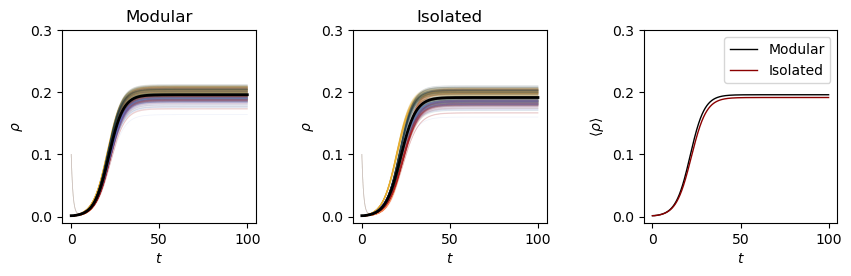

In [23]:
stat_population = np.zeros((len(network_list), N))

fig, ax = plt.subplots(1, len(network_list) + 1, figsize=(10, 2.5))

colors_nets = ['k', 'darkred']

for idx_net, net in enumerate(network_list):
    K = kernels[idx_net]
    print(titles_list[idx_net], '- lambdaMax = ', lambdaMax[idx_net])
    
    rho = model.simulate(N, Nsteps, dt, K, cvec, evec, rho0 = rho_0)

    stat_population[idx_net] = rho[-1]
    
    ax[idx_net].plot(Time, rho.mean(axis = 1), color = 'k', lw = 2, zorder = np.inf)

    for i in range(N_modules):
        ax[idx_net].plot(Time, rho[:, cumsum[i]:cumsum[i+1]], color = colors_list[i], lw = 0.5, alpha = 0.1)

    ax[idx_net].set_xlabel(r'$t$')
    ax[idx_net].set_ylabel(r'$\rho$')

    ax[idx_net].set_title(titles_list[idx_net])

    ax[-1].plot(Time, rho.mean(axis = 1), color = colors_nets[idx_net], lw = 1, zorder = np.inf,
                label = titles_list[idx_net])

    ax[idx_net].set_ylim(-0.01, 0.3)

ax[-1].set_ylim(-0.01, 0.3)
ax[-1].set_xlabel(r'$t$')
ax[-1].set_ylabel(r'$\langle \rho \rangle$')
ax[-1].legend()

plt.subplots_adjust(wspace=0.5)
plt.show()

In [24]:
Hanski_kernels = []

lambdaMax_hanski = []

distmatrix, _ = utils.find_distance_matrix(network_list[0])
alpha = model.get_alpha(kernels[0], distmatrix)
print(alpha)

for i, net in enumerate(network_list):
    distmatrix, _ = utils.find_distance_matrix(net)
    HK = model.find_Hanski_kernel(distmatrix, alpha)
    np.fill_diagonal(HK, 0)
    Hanski_kernels.append(HK)
    lambdaMax_hanski.append(model.find_metapopulation_capacity_Hanski(net, alpha, distmatrix))

0.5727251867747368


/mnt/DAA0C4FEA0C4E1DD/Users/gnico/OneDrive - Università degli Studi di Padova/PhD/projects/microscopic_hanski_model/public_repo/MicroscopicMetaPop/example_notebooks/../modules/model.py:390: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(network).toarray().astype(float)
/mnt/DAA0C4FEA0C4E1DD/Users/gnico/OneDrive - Università degli Studi di Padova/PhD/projects/microscopic_hanski_model/public_repo/MicroscopicMetaPop/example_notebooks/../modules/model.py:390: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(network).toarray().astype(float)


In [27]:
titles_list_Hanski = ['Modular, Hanski', 'Isolated, Hanski']

Modular, Hanski - lambdaMax =  4.782225802704341
Isolated, Hanski - lambdaMax =  4.336728604877637


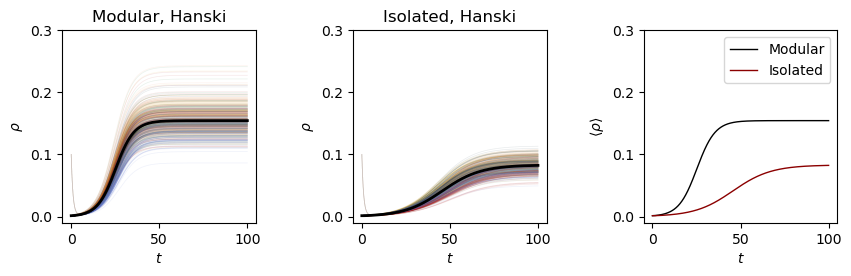

In [28]:
stat_population_Hanski = np.zeros((len(network_list), N))

fig, ax = plt.subplots(1, len(network_list) + 1, figsize=(10, 2.5))

colors_nets = ['k', 'darkred']

for idx_net, net in enumerate(network_list):
    K = Hanski_kernels[idx_net]
    print(titles_list_Hanski[idx_net], '- lambdaMax = ', lambdaMax_hanski[idx_net])
    
    rho = model.simulate(N, Nsteps, dt, K, cvec, evec, rho0 = rho_0)

    stat_population_Hanski[idx_net] = rho[-1]
    
    ax[idx_net].plot(Time, rho.mean(axis = 1), color = 'k', lw = 2, zorder = np.inf)

    for i in range(N_modules):
        ax[idx_net].plot(Time, rho[:, cumsum[i]:cumsum[i+1]], color = colors_list[i], lw = 0.5, alpha = 0.1)

    ax[idx_net].set_xlabel(r'$t$')
    ax[idx_net].set_ylabel(r'$\rho$')

    ax[idx_net].set_title(titles_list_Hanski[idx_net])

    ax[-1].plot(Time, rho.mean(axis = 1), color = colors_nets[idx_net], lw = 1, zorder = np.inf,
                label = titles_list[idx_net])

    ax[idx_net].set_ylim(-0.01, 0.3)

ax[-1].set_ylim(-0.01, 0.3)
ax[-1].set_xlabel(r'$t$')
ax[-1].set_ylabel(r'$\langle \rho \rangle$')
ax[-1].legend()

plt.subplots_adjust(wspace=0.5)
plt.show()

In [34]:
kwargs = {'p_intra': p_intra, 'p_connect': p_connect,
          'Nconn_per_node': Nconn_per_node}

titles_list = ['Modular', *[f'Removed {i+1} comm' for i in range(N_modules)]]

xi = 1
f = 0.5

lambdaMax, network_list = utils.comm_removal(utils.generate_modular_ER, N_modules, Nodes_per_module,
                                             kwargs, f, xi, seed = None)

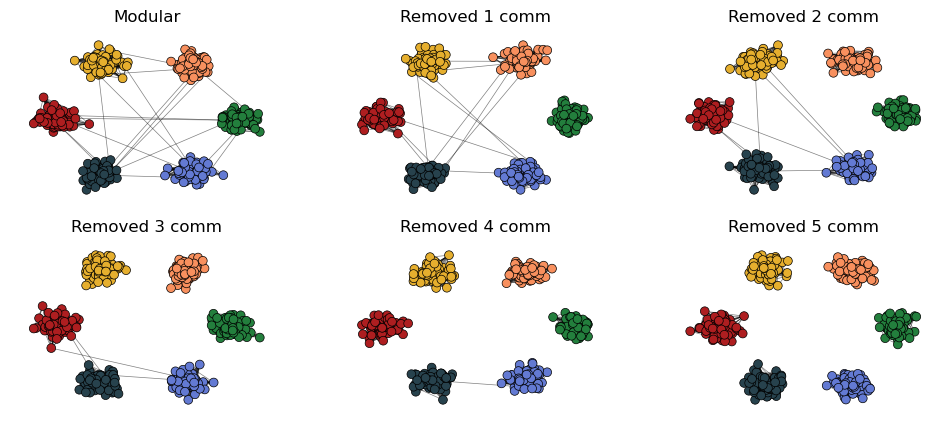

In [35]:
fig, axs = plt.subplots(ncols = N_modules//2, nrows = 2, figsize=(12,5))

for ax in axs.flatten():
    ax.axis('off')

for i, net in enumerate(network_list):
    pos, node_colors = utils.plot_modular(net, colors_list, Nodes_per_module, ax = axs[i // (N_modules//2), i % (N_modules//2)])
    axs[i//(N_modules//2), i%(N_modules//2)].set_title(titles_list[i])

plt.show()

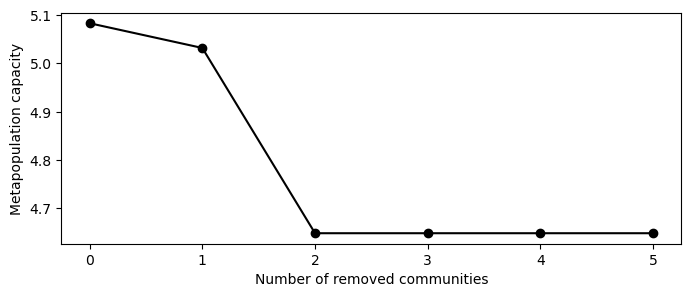

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

ax.plot(lambdaMax, 'o-', color = 'k')
ax.set_ylabel('Metapopulation capacity')
ax.set_xlabel('Number of removed communities')
plt.show()